Index(['system:index', 'bd_h', 'bottom', 'co', 'col_index', 'id', 'left',
       'mean', 'ndvi', 'no2', 'o3', 'right', 'road_w', 'row_index', 'so2',
       'top', 'usc', '.geo'],
      dtype='object')
            bd_h        co       no2        o3    road_w       so2       usc  \
bd_h    1.000000  0.388171  0.446095 -0.008556  0.032847  0.387441  0.843046   
co      0.388171  1.000000  0.536939  0.057431 -0.094299  0.235891  0.366799   
no2     0.446095  0.536939  1.000000  0.083599 -0.096676  0.401852  0.422175   
o3     -0.008556  0.057431  0.083599  1.000000 -0.092887  0.211993  0.034542   
road_w  0.032847 -0.094299 -0.096676 -0.092887  1.000000 -0.007691 -0.456719   
so2     0.387441  0.235891  0.401852  0.211993 -0.007691  1.000000  0.332495   
usc     0.843046  0.366799  0.422175  0.034542 -0.456719  0.332495  1.000000   
ndvi   -0.378257 -0.247974 -0.275160 -0.102790 -0.244805 -0.180381 -0.193276   

            ndvi  
bd_h   -0.378257  
co     -0.247974  
no2    -0.275160  
o3

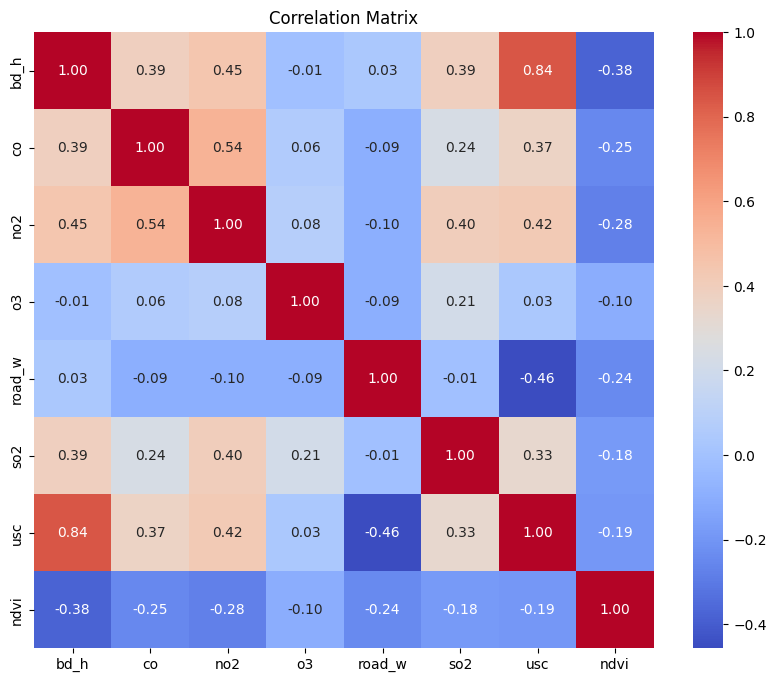

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '2023-52.csv'

df = pd.read_csv(file_path)
print(df.columns)
columns_of_interest = ['bd_h', 'co', 'no2', 'o3', 'road_w','so2', 'usc', 'ndvi']

correlation_matrix = df[columns_of_interest].corr()
print(correlation_matrix)
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
# from google.colab import drive
from sklearn.model_selection import train_test_split

# Mount Google Drive
# drive.mount('/content/drive')

file_path = 'G:/My Drive/geepy/'+str(year) + "-" + str(week_number) + '.csv'

df = pd.read_csv(file_path)
df = df.dropna(subset=['usc'])

if df.shape[0] == 0:
    raise ValueError("No samples available after dropping rows with null values.")

target_variable = 'co'
columns_of_interest = ['usc', 'ndvi']

X = df[columns_of_interest]
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Forward stepwise regression
def forward_stepwise_selection(X, y):
    initial_features = []
    remaining_features = list(X.columns)
    best_features = []
    while remaining_features:
        scores_with_candidates = []
        for candidate in remaining_features:
            features = initial_features + [candidate]
            X_train_with_candidate = sm.add_constant(X[features])
            model = sm.OLS(y, X_train_with_candidate).fit()
            score = model.rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort(reverse=True)
        best_new_score, best_candidate = scores_with_candidates[0]
        if initial_features:
            best_old_score = sm.OLS(y, sm.add_constant(X[initial_features])).fit().rsquared_adj
            if best_new_score <= best_old_score:
                break
        initial_features.append(best_candidate)
        remaining_features.remove(best_candidate)
        best_features.append((best_new_score, best_candidate))
    return best_features

# Perform forward stepwise selection
best_features = forward_stepwise_selection(X_train, y_train)

# Print the selected features and their scores
print("Selected features and their adjusted R-squared scores:")
for score, feature in best_features:
    print(f"{feature}: {score}")

# Build the final model with the selected features
selected_features = [feature for _, feature in best_features]
X_train_selected = sm.add_constant(X_train[selected_features])
X_test_selected = sm.add_constant(X_test[selected_features])
final_model = sm.OLS(y_train, X_train_selected).fit()

# Print the summary of the final model
print(final_model.summary())

# Evaluate the model on the test set
y_pred = final_model.predict(X_test_selected)
print(f"Test set R-squared: {final_model.rsquared}")

Selected features and their adjusted R-squared scores:
ndvi: 0.07363230409636434
usc: 0.0740382640845505
                            OLS Regression Results                            
Dep. Variable:                     co   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     71.40
Date:                Wed, 29 May 2024   Prob (F-statistic):           1.53e-30
Time:                        15:35:34   Log-Likelihood:                 9262.4
No. Observations:                1762   AIC:                        -1.852e+04
Df Residuals:                    1759   BIC:                        -1.850e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm

# กำหนดค่า year และ week_number
year = 2023
week_number = 52
file_path ='G:/My Drive/geepy_hex100/'+str(year) + "-" + str(week_number) + '.csv'

# อ่านไฟล์ CSV เข้าไปใน DataFrame
df = pd.read_csv(file_path)

# คอลัมน์ที่สนใจสำหรับการวิเคราะห์ความสัมพันธ์
columns_of_interest = ['usc', 'co', 'no2', 'o3', 'so2', 'ndvi']

# คำนวณเมทริกซ์ความสัมพันธ์
correlation_matrix = df[columns_of_interest].corr()

# แสดงเมทริกซ์ความสัมพันธ์
print(correlation_matrix)

# แสดงกราฟเมทริกซ์ความสัมพันธ์
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

# กำหนดโฟลเดอร์ที่ใช้บันทึกไฟล์
output_folder = 'D:/py499/gee_usc'

# บันทึกเมทริกซ์ความสัมพันธ์เป็นไฟล์ Excel ในโฟลเดอร์ที่กำหนด
output_excel_path = os.path.join(output_folder, f'{year}_{week_number}.xlsx')
correlation_matrix.to_excel(output_excel_path, index=True)  # บันทึกเป็นไฟล์ Excel

# แสดงหรือพิมพ์เส้นทางของไฟล์ Excel
print(f"Correlation matrix saved as Excel file: {output_excel_path}")

# แสดงกราฟ
plt.show()

# ทำการวิเคราะห์การถดถอยเชิงเส้นอย่างง่ายเพื่อทำนาย 'usc' ตาม 'co'
X = df['co']
y = df['ndvi']

# เพิ่มค่าคงที่ให้กับโมเดล (ค่าจุดตัดแกน y)
X = sm.add_constant(X)

# ทำการฟิตโมเดลการถดถอย
model = sm.OLS(y, X).fit()

# แสดงสรุปผลการถดถอย
print(model.summary())

# แสดงกราฟเส้นการถดถอยพร้อมค่า R-squared
plt.figure(figsize=(10, 6))
sns.scatterplot(x='co', y='ndvi', data=df, label='Data')

# สร้างค่าทำนายสำหรับเส้นการถดถอย
predictions = model.predict(X)

# เนื่องจาก sns.lineplot ต้องการค่า x และ y เราจึงส่งค่าตรงไป
sns.lineplot(x=df['co'], y=predictions, color='red', label='Regression Line')

# เพิ่มข้อความค่า R-squared ในกราฟ
plt.text(0.9, 0.8, f'R-squared = {model.rsquared:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('co')
plt.ylabel('ndvi')
plt.title('Simple Linear Regression: ndvi vs CO')
plt.legend()

# บันทึกกราฟเป็นไฟล์ JPG
output_image_path = os.path.join(output_folder, f'{year}_{week_number}_regression.jpg')
plt.savefig(output_image_path, bbox_inches='tight')

# แสดงผลลัพธ์การบันทึก
print(f"Regression plot saved as JPG file: {output_image_path}")

# แสดงกราฟ
plt.show()

           usc        co       no2        o3       so2      ndvi
usc   1.000000  0.347995  0.398629  0.031489  0.325169 -0.160304
co    0.347995  1.000000  0.534775  0.051438  0.232795 -0.223561
no2   0.398629  0.534775  1.000000  0.075570  0.402490 -0.242720
o3    0.031489  0.051438  0.075570  1.000000  0.212532 -0.098492
so2   0.325169  0.232795  0.402490  0.212532  1.000000 -0.156731
ndvi -0.160304 -0.223561 -0.242720 -0.098492 -0.156731  1.000000


In [ ]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

# Define the year and week_number variables (make sure to set these to appropriate values)
year = 2024  # Example year
week_number = 5  # Example week number

# File path
file_path = 'D:/py499/2024-5.csv'

# Load the data
df = pd.read_csv(file_path)
df = df.dropna(subset=['ndvi','usc'])

# Check if there are any samples left after dropping rows with null values
if df.shape[0] == 0:
    raise ValueError("No samples available after dropping rows with null values.")

# Define target variable and features
target_variable = ['co']
columns_of_interest = ['ndvi','usc']  # List the columns you're interested in

# Split the data into training and test sets
X = df[columns_of_interest]
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Forward stepwise regression function
def forward_stepwise_selection(X, y):
    initial_features = []
    remaining_features = list(X.columns)
    best_features = []
    while remaining_features:
        scores_with_candidates = []
        for candidate in remaining_features:
            features = initial_features + [candidate]
            X_train_with_candidate = sm.add_constant(X[features])
            model = sm.OLS(y, X_train_with_candidate).fit()
            score = model.rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort(reverse=True)
        best_new_score, best_candidate = scores_with_candidates[0]
        if initial_features:
            best_old_score = sm.OLS(y, sm.add_constant(X[initial_features])).fit().rsquared_adj
            if best_new_score <= best_old_score:
                break
        initial_features.append(best_candidate)
        remaining_features.remove(best_candidate)
        best_features.append((best_new_score, best_candidate))
    return best_features

# Perform forward stepwise selection
best_features = forward_stepwise_selection(X_train, y_train)

# Print the selected features and their adjusted R-squared scores
print("Selected features and their adjusted R-squared scores:")
for score, feature in best_features:
    print(f"{feature}: {score}")

# Build the final model with the selected features
selected_features = [feature for _, feature in best_features]
X_train_selected = sm.add_constant(X_train[selected_features])
X_test_selected = sm.add_constant(X_test[selected_features])
final_model = sm.OLS(y_train, X_train_selected).fit()

# Print the summary of the final model
print(final_model.summary())

# Evaluate the model on the test set
y_pred = final_model.predict(X_test_selected)
print(f"Test set R-squared: {final_model.rsquared}")

# Get the regression parameters
alpha = final_model.params['const']
betas = final_model.params.drop('const')
r_squared = final_model.rsquared

# Plotting the regression results for each feature separately
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[feature], y_test, color='blue', label='Actual values')
    plt.plot(X_test[feature], X_test_selected[feature] * betas[feature] + alpha, color='red', linewidth=2, label='Regression line')
    plt.xlabel(feature)
    plt.ylabel(['co','no2', 'o3', 'no2'])
    plt.title(f'Regression line and actual values for {feature}')
    plt.legend()

    # Add the regression equation and R-squared value to the plot
    equation_text = f'$\\hat{{Y}} = {alpha:.2f} + {betas[feature]:.2f}X$'
    r_squared_text = f'$R^2 = {r_squared:.2f}$'
    plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    plt.text(0.05, 0.90, r_squared_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

    # # Save the plot to the specified output folder
    # output_folder = 'D:\py499\multi_re'
    # os.makedirs(output_folder, exist_ok=True)
    # output_path = os.path.join(output_folder, f'regression_plot_{feature}_{year}_week_{week_number}.png')
    # plt.savefig(output_path)
    # plt.show()

    # print(f"Plot for {feature} saved to {output_path}")

In [ ]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

def perform_analysis_for_week(year, week_number):
    file_path = f'G:/My Drive/usc_zonal_cir_3/{year}-{week_number}.csv'
    
    # Load the data
    df = pd.read_csv(file_path)
    df = df.dropna(subset=["usc", "lst"])

    if df.shape[0] == 0:
        raise ValueError(f"No samples available after dropping rows with null values for {year}-{week_number}.")

    # Define target variable and features
    target_variable = 'o3'
    columns_of_interest = ["usc", "lst", "ndmi", "ndvi", "ndbi"]

    # Split the data into training and test sets
    X = df[columns_of_interest]
    y = df[target_variable]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Forward stepwise regression function
    def forward_stepwise_selection(X, y):
        initial_features = []
        remaining_features = list(X.columns)
        best_features = []
        while remaining_features:
            scores_with_candidates = []
            for candidate in remaining_features:
                features = initial_features + [candidate]
                X_train_with_candidate = sm.add_constant(X[features])
                model = sm.OLS(y, X_train_with_candidate).fit()
                score = model.rsquared_adj
                scores_with_candidates.append((score, candidate))
            scores_with_candidates.sort(reverse=True)
            best_new_score, best_candidate = scores_with_candidates[0]
            if initial_features:
                best_old_score = sm.OLS(y, sm.add_constant(X[initial_features])).fit().rsquared_adj
                if best_new_score <= best_old_score:
                    break
            initial_features.append(best_candidate)
            remaining_features.remove(best_candidate)
            best_features.append((best_new_score, best_candidate))
        return best_features

    # Perform forward stepwise selection
    best_features = forward_stepwise_selection(X_train, y_train)

    # Print the selected features and their adjusted R-squared scores
    print("Selected features and their adjusted R-squared scores:")
    for score, feature in best_features:
        print(f"{feature}: {score}")

    # Build the final model with the selected features
    selected_features = [feature for _, feature in best_features]
    X_train_selected = sm.add_constant(X_train[selected_features])
    X_test_selected = sm.add_constant(X_test[selected_features])
    final_model = sm.OLS(y_train, X_train_selected).fit()

    # Print the summary of the final model
    print(final_model.summary())

    # Evaluate the model on the test set
    y_pred = final_model.predict(X_test_selected)
    print(f"Test set R-squared: {final_model.rsquared}")

    # Save the summary to a text file
    summary_text = final_model.summary().as_text()
    output_folder = 'r-square_cir3'
    output_file = os.path.join(output_folder, f'{target_variable}_{year}-{week_number}.txt')
    
    with open(output_file, 'w') as file:
        file.write(summary_text)

    # Print additional model evaluation
    print(f"Test set R-squared: {final_model.rsquared}")


years = [2021] 
weeks_per_year = [45,46,47,48,49,50,51,52]  

# years = [2022]  
# weeks_per_year = [45,46,47,48,49,50,51,52,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22]  

# years = [2023]  
# weeks_per_year = [45,46,47,48,49,50,51,52,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,21,22] 

# years = [2024]
# weeks_per_year=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22]


for year in years:
    for week_number in weeks_per_year:
        print(f"Performing analysis for {year}-{week_number}...")
        perform_analysis_for_week(year, week_number)
        print(f"Analysis for {year}-{week_number} completed.\n")


In [58]:
import pandas as pd
import json
import psycopg2

# Connection string for PostgreSQL
conn_string = "dbname='app_usc' user='postgres' host='localhost' port='5432' password='1234'"

def insert_data(row):
    query = """
    INSERT INTO lst_2023 (gid, lstfri, lstmon, lstsat, lstsun, lstthu, lsttue, lstwed, usc, geom) 
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, ST_SetSRID(ST_GeomFromGeoJSON(%s), 4326));
    """

    geo_json_str = row['geom']  # Assuming 'geom' is already a valid GeoJSON string

    with psycopg2.connect(conn_string) as conn:
        with conn.cursor() as cur:
            try:
                cur.execute(query, (
                    row['gid'], row['lstfri'], row['lstmon'], row['lstsat'], 
                    row['lstsun'], row['lstthu'], row['lsttue'], row['lstwed'], 
                    row['usc'], geo_json_str
                ))
                conn.commit()
                print(f"Inserted row with geo: {geo_json_str}")
            except Exception as e:
                conn.rollback()
                print(f"Failed to insert row with geo: {geo_json_str}")
                print(e)  # Print the error message for further debugging
                return 'insert failed'
    return 'insert ok'

# Path to the uploaded CSV file
csv_file_path = 'G:/My Drive/_GEE_200/2023-11-06_2024-05-19/usc_lst.csv'
# 2020-11-08_2021-05-23
# 2021-11-08_2022-05-22
# 2022-11-07_2023-05-21
# 2023-11-06_2024-05-19
# Read CSV file
df = pd.read_csv(csv_file_path)

# Iterate over the DataFrame rows and insert each row into the database
for index, row in df.iterrows():
    result = insert_data(row)
    print(result)  # Print the result of the insert operation

print("All data processed successfully")


Inserted row with geo: {"type":"Polygon","coordinates":[[[98.92145131982353,18.737423564555087],[98.92199981010558,18.736522785455335],[98.9230968021826,18.73652284498219],[98.92364521976054,18.73742799453905],[98.9230968021826,18.73832877536244],[98.92199981010558,18.73832871988656],[98.92145131982353,18.737423564555087]]]}
insert ok
Inserted row with geo: {"type":"Polygon","coordinates":[[[98.92199981010558,18.736522785455335],[98.92145131982353,18.7356176325376],[98.92199981010558,18.734712459139576],[98.9230968021826,18.734716833649316],[98.92364521976054,18.735617580052292],[98.9230968021826,18.73652284498219],[98.92199981010558,18.736522785455335]]]}
insert ok
Inserted row with geo: {"type":"Polygon","coordinates":[[[98.92199981010558,18.734712459139576],[98.92145578318666,18.73381167589377],[98.92200427349994,18.732906508957875],[98.9230968021826,18.73290652028013],[98.92364521976054,18.733811664998314],[98.9230968021826,18.734716833649316],[98.92199981010558,18.734712459139576]

In [33]:
import pandas as pd
import json
import psycopg2

# Connection string for PostgreSQL
conn_string = "dbname='app_usc' user='postgres' host='localhost' port='5432' password='1234'"

def insert_data(row):
    query = """
    INSERT INTO no2_2023 (gid, no2fri, no2mon, no2sat, no2sun, no2thu, no2tue, no2wed, usc, geom) 
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, ST_SetSRID(ST_GeomFromGeoJSON(%s), 4326));
    """

    geo_json_str = row['geom']  # Assuming 'geom' is already a valid GeoJSON string

    with psycopg2.connect(conn_string) as conn:
        with conn.cursor() as cur:
            try:
                cur.execute(query, (
                    row['gid'], row['no2fri'], row['no2mon'], row['no2sat'], 
                    row['no2sun'], row['no2thu'], row['no2tue'], row['no2wed'], 
                    row['usc'], geo_json_str
                ))
                conn.commit()
                print(f"Inserted row with geo: {geo_json_str}")
            except Exception as e:
                conn.rollback()
                print(f"Failed to insert row with geo: {geo_json_str}")
                print(e)  # Print the error message for further debugging
                return 'insert failed'
    return 'insert ok'

# Path to the uploaded CSV file
csv_file_path = 'G:/My Drive/_GEE_200/2023-11-06_2024-05-19/usc_no2.csv'

# 2021-11-08_2022-05-22
# 2022-11-07_2023-05-21
# Read CSV file
df = pd.read_csv(csv_file_path)

# Iterate over the DataFrame rows and insert each row into the database
for index, row in df.iterrows():
    result = insert_data(row)
    print(result)  # Print the result of the insert operation

print("All data processed successfully")


Inserted row with geo: {"type":"Polygon","coordinates":[[[98.92145131982353,18.737423564555087],[98.92199981010558,18.736522785455335],[98.9230968021826,18.73652284498219],[98.92364521976054,18.73742799453905],[98.9230968021826,18.73832877536244],[98.92199981010558,18.73832871988656],[98.92145131982353,18.737423564555087]]]}
insert ok
Inserted row with geo: {"type":"Polygon","coordinates":[[[98.92199981010558,18.736522785455335],[98.92145131982353,18.7356176325376],[98.92199981010558,18.734712459139576],[98.9230968021826,18.734716833649316],[98.92364521976054,18.735617580052292],[98.9230968021826,18.73652284498219],[98.92199981010558,18.736522785455335]]]}
insert ok
Inserted row with geo: {"type":"Polygon","coordinates":[[[98.92199981010558,18.734712459139576],[98.92145578318666,18.73381167589377],[98.92200427349994,18.732906508957875],[98.9230968021826,18.73290652028013],[98.92364521976054,18.733811664998314],[98.9230968021826,18.734716833649316],[98.92199981010558,18.734712459139576]

In [6]:
import pandas as pd
import json
import psycopg2

# Connection string for PostgreSQL
conn_string = "dbname='app_usc' user='postgres' host='localhost' port='5432' password='1234'"

def insert_data(row):
    query = """
    INSERT INTO o3_2020 (gid, o3fri, o3mon, o3sat, o3sun, o3thu, o3tue, o3wed, usc, geom) 
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, ST_SetSRID(ST_GeomFromGeoJSON(%s), 4326));
    """

    geo_json = {
        "type": "Point",
        "coordinates": [row['lng'], row['lat']]  # Assuming lng is the longitude and lat is the latitude
    }
    geo_json_str = json.dumps(geo_json)

    with psycopg2.connect(conn_string) as conn:
        with conn.cursor() as cur:
            try:
                cur.execute(query, (
                    row['gid'], row['o3fri'], row['o3mon'], row['o3sat'], row['o3sun'], 
                    row['o3thu'], row['o3tue'], row['o3wed'], row['usc'], geo_json_str
                ))
                conn.commit()
                print(f"Inserted row with geo: {geo_json_str}")
            except Exception as e:
                conn.rollback()
                print(f"Failed to insert row with geo: {geo_json_str}")
                print(e)  # Print the error message for further debugging
                return 'insert failed'
    return 'insert ok'

# Path to the uploaded CSV file
csv_file_path = 'G:/My Drive/_GEE_200/2023-11-06_2024-05-19/usc_o3.csv'

# Read CSV file
df = pd.read_csv(csv_file_path)

# Iterate over the DataFrame rows and insert each row into the database
for index, row in df.iterrows():
    result = insert_data(row)
    print(result)  # Print the result of the insert operation

print("All data processed successfully")


KeyError: 'lng'